In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('india_housing_prices.csv', delimiter=',')
print(df.head())

   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   

  Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
0              35              10                 3   
1              17               8                 1   
2    

#### Beginner Section

In [2]:
#1. Calculate average property prices across states.
column_mean = df['Price_in_Lakhs'].mean()
print(f"Average property prices across states: {column_mean: .3f}")

Average property prices across states:  254.587


In [3]:
#2. Determine which states have the most affordable housing.
afford_hous = df.sort_values(['Price_in_Lakhs'], ascending=True)
print(afford_hous[['State','Price_in_Lakhs']].head(10))

                 State  Price_in_Lakhs
174678          Odisha           10.00
133878         Haryana           10.00
120777  Madhya Pradesh           10.01
185609         Haryana           10.01
82936        Rajasthan           10.02
209905    Chhattisgarh           10.02
29384    Uttar Pradesh           10.02
76103           Odisha           10.03
52179       Tamil Nadu           10.03
123965          Odisha           10.03


In [4]:
#3. ⁠Count the distribution of property types (e.g., Apartments vs Villas).
No_of_apart = sum(df['Property_Type'] == 'Apartment')
No_of_villa = sum(df['Property_Type'] == 'Villa')
No_of_InHouse = sum(df['Property_Type'] == 'Independent House')

print(f"Number of Apartments: {No_of_apart}")
print(f"Number of Villas: {No_of_villa}")
print(f"Number of Independent Houses: {No_of_InHouse}")

Number of Apartments: 82956
Number of Villas: 83744
Number of Independent Houses: 83300


In [5]:
#4. ⁠Identify the average property size and price per square foot.
avg_prop_size = df['Size_in_SqFt'].mean()
avg_price = df['Price_per_SqFt'].mean()

print(f"The Average Property Size: {avg_prop_size: .2f}")
print(f"The Average Price per square foot: {avg_price: .2f}")

The Average Property Size:  2749.81
The Average Price per square foot:  0.13


#### Intermediate Section

The Correlation between the property size and the Price:                 Size_in_SqFt  Price_in_Lakhs
Size_in_SqFt        1.000000       -0.002529
Price_in_Lakhs     -0.002529        1.000000




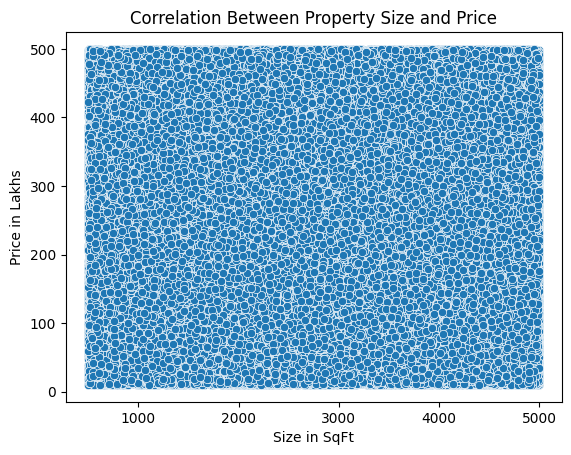

In [6]:
# 1. Correlation between property size and price

correlation = df[['Size_in_SqFt', 'Price_in_Lakhs']].corr()
print(f'The Correlation between the property size and the Price: {correlation}')
# Plot the relationship
print('\n')
sns.scatterplot(data=df, x='Size_in_SqFt', y='Price_in_Lakhs')
plt.title('Correlation Between Property Size and Price')
plt.xlabel('Size in SqFt')
plt.ylabel('Price in Lakhs')
plt.show()

In [7]:
# 2. Investigate the impact of location (state/city) on prices.
grouped_data = df.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False)
# Display top and bottom 5 cities by price
print("Top 5 Most Expensive Cities by Average Price:")
print(grouped_data.head(5))

print("\nTop 5 Most Affordable Cities by Average Price:")
print(grouped_data.tail(5))

Top 5 Most Expensive Cities by Average Price:
City
Bangalore    258.456639
Surat        258.080467
Kochi        257.415221
Gaya         257.053391
Mangalore    256.920925
Name: Price_in_Lakhs, dtype: float64

Top 5 Most Affordable Cities by Average Price:
City
Mumbai        252.056633
Bilaspur      251.879267
New Delhi     251.614296
Trivandrum    251.258801
Cuttack       250.786672
Name: Price_in_Lakhs, dtype: float64


In [8]:
# 3. Compare property prices based on furnishing status and availability.
furnishing_price_comparison = df.groupby('Furnished_Status')['Price_in_Lakhs'].mean()
print("\nAverage Price by Furnishing Status:")
print(furnishing_price_comparison)


Average Price by Furnishing Status:
Furnished_Status
Furnished         254.445550
Semi-furnished    254.334836
Unfurnished       254.979752
Name: Price_in_Lakhs, dtype: float64


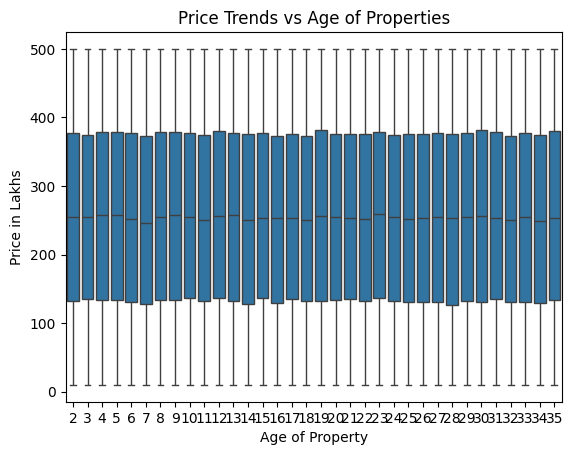

In [9]:
# 4. Examine the age of properties in relation to their price trends.

sns.boxplot(data=df, x='Age_of_Property', y='Price_in_Lakhs')
plt.title('Price Trends vs Age of Properties')
plt.xlabel('Age of Property')
plt.ylabel('Price in Lakhs')
plt.show()


#### Questions to Explore

The correlation between Public transport accessibility and property prices:  0.00
The t-score and p-value are:  0.081 &  0.935, respectively


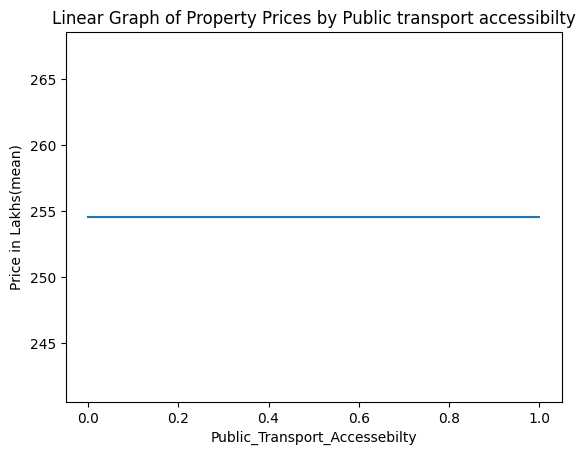

In [10]:
#1. How does public transport accessibility affect property prices?
hi_pt_values = df['Public_Transport_Accessibility'] == 'High'
lo_pt_values = df['Public_Transport_Accessibility'] == 'Low'

high_pub_trans_access = df[hi_pt_values]['Price_in_Lakhs']
low_pub_trans_access = df[lo_pt_values]['Price_in_Lakhs']

# convert them to intger values since they are bool, and true rep 1 and false rep 0. Show the correlation
correlation = hi_pt_values.astype(int).corr(df['Price_in_Lakhs'])
print(f'The correlation between Public transport accessibility and property prices: {correlation: .2f}')

mean_price = df['Price_in_Lakhs'].mean()

# conduct t-test
t_score, p_value = stats.ttest_ind(high_pub_trans_access,low_pub_trans_access)
print(f'The t-score and p-value are: {t_score: .3f} & {p_value: .3f}, respectively')

sns.lineplot(x=hi_pt_values.astype(int), y=mean_price)
plt.title("Linear Graph of Property Prices by Public transport accessibilty")
plt.xlabel('Public_Transport_Accessebilty')
plt.ylabel('Price in Lakhs(mean)')
plt.show()


In [11]:
#2. Are furnished properties significantly more expensive than unfurnished ones?

# Split the data into two groups
furnished_prop = df[df['Furnished_Status'] == 'Furnished']['Price_in_Lakhs']
unfurnished_prop = df[df['Furnished_Status'] == 'Unfurnished']['Price_in_Lakhs']

# Perform an independent t-test
t_score, p_value = stats.ttest_ind(furnished_prop,unfurnished_prop)

if p_value < 0.05:
    print(f'Since the p-value and t-score are {p_value: .3f} & {t_score: .3f} respectively, \ntherefore the furnished properties are significantly more expensive than the unfurnished ones')
else:
    print(f'Since the p-value and t-score are {p_value: .3f} & {t_score: .3f} respectively, \ntherefore the furnished properties are not significantly more expensive than the umfurnished ones')    



Since the p-value and t-score are  0.440 & -0.772 respectively, 
therefore the furnished properties are not significantly more expensive than the umfurnished ones


   Num_Amenities  Price_in_Lakhs
0              3      255.108414
1              4      254.914241
2              6      255.011177
3              9      254.795395
    Num_Amenities  Price_in_Lakhs
21             32      253.778074
22             34      254.355027
23             35      253.808656
24             40      254.919710


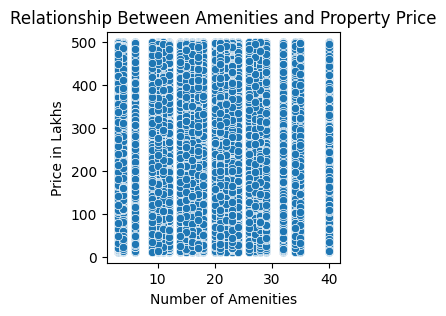

Correlation between Amenities and Price: 0.00


In [12]:
# Do properties with more amenities have a higher average price?
df["Num_Amenities"] = df["Amenities"].apply(len)
avg_price_by_amenities = df.groupby("Num_Amenities")["Price_in_Lakhs"].mean().reset_index()

print(avg_price_by_amenities.head(4))
print(avg_price_by_amenities.tail(4))

plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x="Num_Amenities", y="Price_in_Lakhs")
plt.xlabel("Number of Amenities")
plt.ylabel("Price in Lakhs")
plt.title("Relationship Between Amenities and Property Price")
plt.show()

correlation = df["Num_Amenities"].corr(df["Price_in_Lakhs"])
print(f"Correlation between Amenities and Price: {correlation:.2f}")


#### Advanced Section

Linear Regression:
Mean Squared Error:  10204.325
R-squared Score:  0.488


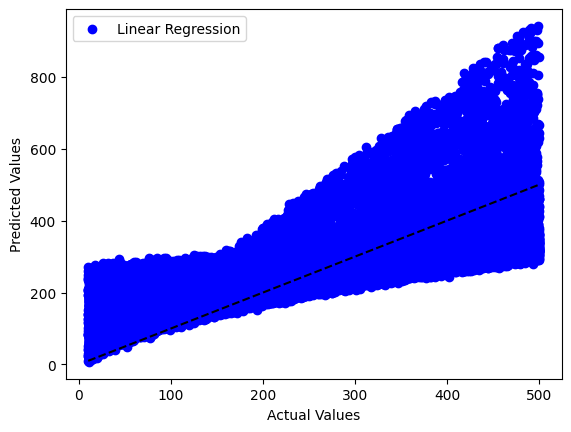

In [13]:
#1. Build predictive models (e.g., Linear Regression, Decision Trees) to estimate property prices based on features.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical text columns into numeric format
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Price_in_Lakhs', axis=1)
y = df['Price_in_Lakhs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear): .3f}")
print(f"R-squared Score: {r2_score(y_test, y_pred_linear): .3f}")

plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

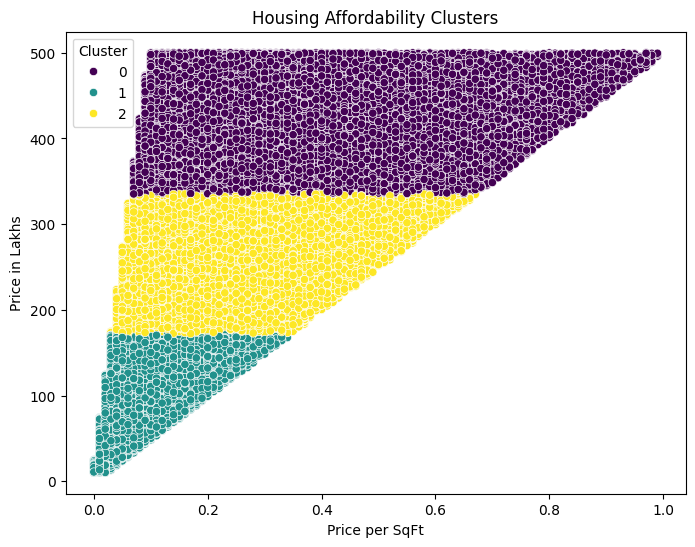

In [14]:
# 2.⁠ ⁠⁠Perform clustering to segment cities or states by housing affordability.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Price_in_Lakhs', 'Price_per_SqFt']])

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price_per_SqFt', y='Price_in_Lakhs', hue='Cluster', palette='viridis')
plt.title('Housing Affordability Clusters')
plt.xlabel('Price per SqFt')
plt.ylabel('Price in Lakhs')
plt.legend(title='Cluster')
plt.show()



In [ ]:
n = float(input('Real numbers: '))
i = 1 
while (i <= n):
    if(i % 2 == 0):
        print(i)
    else:
        pass
    i += 1
print("done")

In [37]:
L = []

for i in range (0,10,2):
    print(i)
    L.append(i**2)
print(L)

0
2
4
6
8
[0, 4, 16, 36, 64]


In [21]:
L = [1,2,4,-5,7,9,3,2]
nL = []
for i in L:
    if i < L[0]:
        nL.append(i)
print(nL)
print(len(L))

[-5]
8


In [59]:
def printMessage(msg):
    """ This function prints out the variable that has been typed in if its a string """
    if isinstance(msg, str):
        print(msg)
    elif isinstance(msg,(int, float)):
        print(msg, type(msg))

printMessage(34.67)


34.67 <class 'float'>


In [ ]:
def myadd(a,b):
    sumValue = a + b 
    return sumValue


In [20]:
def add(*args):
    sum = 0
    for i in range(len(args)):
        sum += args[i]
    return sum
add(2,1,3,4)
# using * in arguments means that the function youre defining can accept an arbitrary number of arguments

10

In [ ]:
import sys
sys.path.append('')


In [2]:
"""Let say you are a teacher and you have different studemt records containing id of a student and the
the marks list in each subject where different students have taken different number of subjects. All these 
records are in hard copy. You want to enter all the data in computer and want to compute the average marks of each student
and display
"""

def getDataFromTheUser():
    D ={}
    while True:
        student_id = input('Enter student ID: ')
        marks_list = input('Enter the marks by comma seperated value: ')
        more_students = input('Enter "no" to quit insertion: ')

        if student_id in D:
            print(student_id, "is already inserted")
        else:
            D[student_id] = marks_list.split(',')
        if more_students.lower() == "no":
            return D  

In [3]:
studentsData = getDataFromTheUser()


In [4]:
studentsData

{'12': ['23', '45', '67', '88'],
 '24': ['12', '67', '88'],
 '45': ['67', '89', '56']}

In [6]:
def getAvgMarks(D):
    avgMarks = {}
    for x in D:
        L = D[x]
        s = 0
        for marks in L:
            s += int(marks)
        avgMarks[x] = s/len(L)
    return avgMarks

In [8]:
avgM = getAvgMarks(studentsData)
for x in avgM:
    print("Student: ",x,"Got an average mark: ",round(avgM[x],2))

Student:  12 Got an average mark:  55.75
Student:  24 Got an average mark:  55.67
Student:  45 Got an average mark:  70.67


In [18]:
a = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]]], dtype='int64')
print(a.ndim)
print(a[1,2,2])
print(a.dtype)

3
18
int64
